# Logistic Regression Implementation

### PreProcess Data

In [3]:
import PreProcessData as pre
import imp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
imp.reload(pre)
X_train, X_valid, y_train, y_valid = pre.PreProcessData()
y_valid = [0 if int(y) == 2 or int(y) == 3 else y for y in y_valid]
y_valid = np.array(y_valid)
y_valid = y_valid.reshape(-1,1)

### Class Construction

In [4]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        num_samples, num_features = X.shape

        # Initialize parameters
        self.weights = np.zeros(num_features)
        self.bias = 0

        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            # Compute gradients
            dw = (1 / num_samples) * np.dot(X.T, (y_predicted -y))
            db = (1 / num_samples) * np.sum(y_predicted - y)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted_per = self.sigmoid(linear_model)
        y_predicted_bool = [1 if i > 0.5 else 0 for i in y_predicted_per]
        return y_predicted_per, y_predicted_bool

    def validate(self, y_pred, y_valid):
        num_of_correct_predictions = 0
        for i in range(len(y_valid)):
            if y_pred[i] == y_valid[i]:
                num_of_correct_predictions += 1
        accuracy = num_of_correct_predictions / len(y_valid)
        return accuracy


    def plot(self, y_pred, y_valid):
        y_pred = [0 if y < 0.5 else 1 for y in y_pred]
        # Calculate confusion matrix
        cm = confusion_matrix(y_valid, y_pred)

        # Define labels for the confusion matrix
        labels = [['True Negative', 'False Positive'], ['False Negative', 'True Positive']]

        # Plot confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

        # Annotate cells with labels
        for i in range(2):
            for j in range(2):
                plt.text(j + 0.5, i + 0.3, labels[i][j], ha='center', va='center', color='red')

        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix with Labels')
        plt.show()


### Model Construction

In [5]:
model = LogisticRegression(learning_rate=0.01, num_iterations=1000)
model.fit(X_train, y_train)
y_predicted_per, y_predicted_bool = model.predict(X_valid)
y_predicted_bool = np.array(y_predicted_bool)

### Get Model Accuracy

In [6]:
print(model.validate(y_predicted_bool, y_valid))

0.7219610476830087


### Get Model Plot

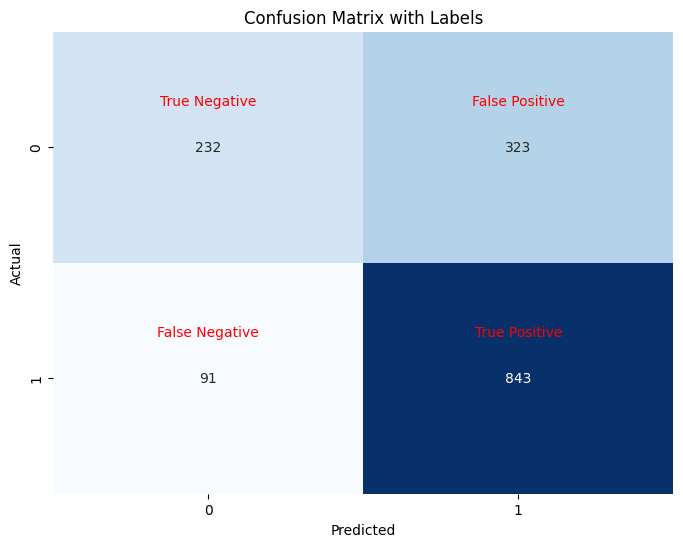

In [7]:
model.plot(y_predicted_bool, y_valid)